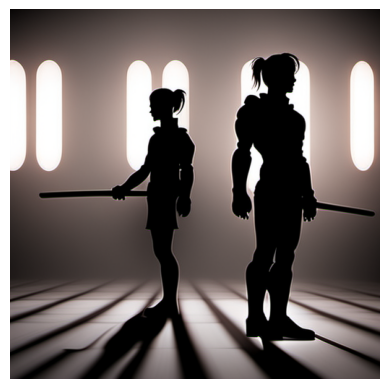

In [9]:
import requests
import json
import matplotlib.pyplot as plt
import io
import base64

api_key = ""

scene_description = """
Setting: Io base gym – characterized by metallic walls and a cold floor.

Futuristic Gym Equipment: include recognizable gym equipment with a futuristic spin:

Weights Area: Advanced weight-lifting equipment that has sleek designs, possibly with digital interfaces or holographic displays showing weight, reps, and other stats.
Treadmills: Futuristic treadmills that might be elevated slightly off the ground, with holographic displays showing speed, distance, and other metrics.
Living Area: Perhaps some advanced recovery pods or relaxation zones with soft ambient lighting.
Other Equipment: Modern versions of elliptical trainers, stationary bikes, and rowing machines, all with a sleek, futuristic design.


Characters:

1. Master:
   - Description: A tall figure with long, flowing black hair, dressed in a green and brown outfit. They exude an aura of power and calm confidence.
   - Position: Standing upright, confident posture.
   - Action: Extending a hand to help the apprentice up, holding a wooden practice sword in the other hand.
   - Expression: Firm yet encouraging.
   - Props: Wooden practice sword.

2. Apprentice:
   - Description: A younger male with short, blonde hair and a serious expression. He's wearing a simple white cloak with a collar, and his eyes show a mix of determination and curiosity.
   - Position: Sprawled on the cold floor.
   - Action: Fallen, looking up towards the master.
   - Expression: A mix of frustration and determination.
   - Props: Wooden practice sword, lying nearby after being dropped.

Scene Details:
- The apprentice's wooden practice sword has clattered against the metallic walls, emphasizing the force from the fall.
- The air around the scene should feel slightly charged, hinting at the telekinetic force mentioned.
- Both characters should have their hair slightly ruffled from the recent movement and force of their spar.
- Optional: Shadows and lighting can be used to emphasize the swift movements that just occurred, perhaps a blur or trail of where the wooden blades passed.
"""


# Function to display base64 encoded image
def display_base64_image(base64_string):
    # Decode the base64 string
    image_bytes = base64.b64decode(base64_string)
    
    # Convert bytes to image
    image = io.BytesIO(image_bytes)
    
    # Display the image using matplotlib
    plt.imshow(plt.imread(image))
    plt.axis('off')  # Hide axes
    plt.show()

# API request details
url = "https://api.wizmodel.com/sdapi/v1/txt2img"

payload = json.dumps({
  "prompt": scene_description,
      "steps": 100
})

headers = {
  'Content-Type': 'application/json',
  'Authorization': 'Bearer ' + api_key  # Replace with your actual API key
}

# Making the API request
response = requests.request("POST", url, headers=headers, data=payload)
response_data = response.json()

# Extracting the base64 encoded image string from the response
encoded_string = response_data['images'][0]

# Displaying the image
display_base64_image(encoded_string)

Here we playing with free stable diffusion model on wiznet. Remeber when running this use your own api key. Easy to get if you have git account. 

In [5]:
url = "https://api.wizmodel.com/v1/predictions"

payload = json.dumps({
  "input": {
    "prompt": "write python code to add two numbers"
  },
  "version": "5fdf066b34f07a64b692d506dd9bc76ee1574fe18ccc7e98e36647d974687ce4"
})
headers = {
  'Content-Type': 'application/json',
  'Authorization': 'Bearer '+api_key
}

response_data = requests.request("POST", url, headers=headers, data=payload)


# Displaying the prompt
print("Prompt:", response_data['input']['prompt'])
print("\n")

# Displaying the returned code
code = response_data['output']['choices'][0]['text']
print("Returned Code:")
print("---------------")
print(code)
print("\n")

# Displaying additional details
print("Details:")
print("--------")
print("Model Used:", response_data['output']['model'])
print("Completion Tokens:", response_data['output']['usage']['completion_tokens'])
print("Total Tokens:", response_data['output']['usage']['total_tokens'])


TypeError: 'Response' object is not subscriptable